In [64]:
library(tidyverse)
library(nycflights13)

<img src = "https://jrnold.github.io/r4ds-exercise-solutions/diagrams/nycflights.png">

In [ ]:
flights %>% head() 
airlines %>% head() # 항공사
airports %>% head() # 공항
planes %>% head() # 여객기
weather %>% head() # 공항의 매 시각 날씨 정보

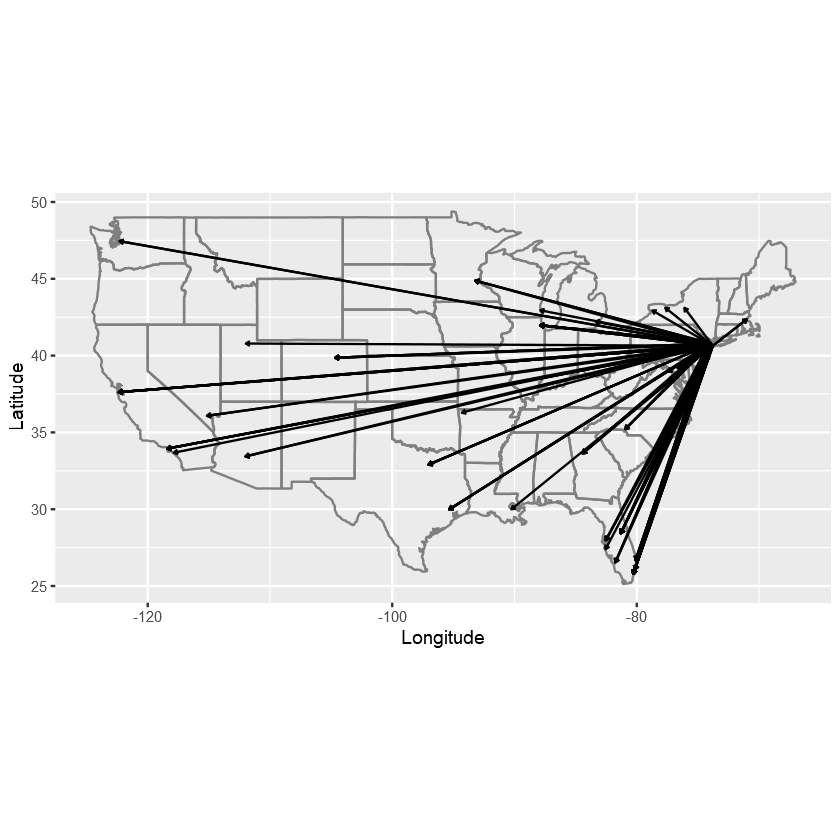

In [65]:
flights_latlon <- flights %>%
  inner_join(select(airports, origin = faa, origin_lat = lat, origin_lon = lon),
    by = "origin"
  ) %>%
  inner_join(select(airports, dest = faa, dest_lat = lat, dest_lon = lon),
    by = "dest"
  )
flights_latlon %>%
  slice(1:100) %>%
  ggplot(aes(
    x = origin_lon, xend = dest_lon,
    y = origin_lat, yend = dest_lat
  )) +
  borders("state") +
  geom_segment(arrow = arrow(length = unit(0.1, "cm"))) +
  coord_quickmap() +
  labs(y = "Latitude", x = "Longitude")

### key
* 기본키 (primary key) : 자신의 테이블에서 관측값을 고유하게 식별
* 외래키 (foreign key) : 다른 테이블의 관측값을 고유하게 식별, 다른 테이블의 열과 매칭
* 대체키 (surrogate key)

- 기본키와 이와 대응되는 다른 테이블의 외래키는 관계를 형성 [일대다 (one-to-many)]

In [66]:
planes %>% head()

tailnum year type                    manufacturer     model     engines seats
1 N10156  2004 Fixed wing multi engine EMBRAER          EMB-145XR 2        55  
2 N102UW  1998 Fixed wing multi engine AIRBUS INDUSTRIE A320-214  2       182  
3 N103US  1999 Fixed wing multi engine AIRBUS INDUSTRIE A320-214  2       182  
4 N104UW  1999 Fixed wing multi engine AIRBUS INDUSTRIE A320-214  2       182  
5 N10575  2002 Fixed wing multi engine EMBRAER          EMB-145LR 2        55  
6 N105UW  1999 Fixed wing multi engine AIRBUS INDUSTRIE A320-214  2       182  
  speed engine   
1 NA    Turbo-fan
2 NA    Turbo-fan
3 NA    Turbo-fan
4 NA    Turbo-fan
5 NA    Turbo-fan
6 NA    Turbo-fan

In [67]:
planes %>% count(tailnum) %>% filter(n > 1)

tailnum n

In [68]:
weather %>% count(year, month, day, hour, origin) %>% filter(n > 1)

year month day hour origin n
1 2013 11    3   1    EWR    2
2 2013 11    3   1    JFK    2
3 2013 11    3   1    LGA    2

In [69]:
flights %>% count(year, month, day, flight) %>% filter(n > 1) %>% head()

year month day flight n
1 2013 1     1    1     2
2 2013 1     1    3     2
3 2013 1     1    4     2
4 2013 1     1   11     3
5 2013 1     1   15     2
6 2013 1     1   21     2

In [70]:
flights %>% count(year, month, day, tailnum) %>% filter(n > 1) %>% head()

year month day tailnum n
1 2013 1     1   N0EGMQ  2
2 2013 1     1   N11189  2
3 2013 1     1   N11536  2
4 2013 1     1   N11544  3
5 2013 1     1   N11551  2
6 2013 1     1   N12540  2

In [71]:
# 10.3.1
# 1 
flights %>%
  arrange(year, month, day, sched_dep_time, carrier, flight) %>%
  mutate(flight_id = row_number()) %>%
  head()

year month day dep_time sched_dep_time dep_delay arr_time sched_arr_time
1 2013 1     1   517      515             2         830      819          
2 2013 1     1   533      529             4         850      830          
3 2013 1     1   542      540             2         923      850          
4 2013 1     1   544      545            -1        1004     1022          
5 2013 1     1   554      558            -4         740      728          
6 2013 1     1   559      559             0         702      706          
  arr_delay carrier flight tailnum origin dest air_time distance hour minute
1  11       UA      1545   N14228  EWR    IAH  227      1400     5    15    
2  20       UA      1714   N24211  LGA    IAH  227      1416     5    29    
3  33       AA      1141   N619AA  JFK    MIA  160      1089     5    40    
4 -18       B6       725   N804JB  JFK    BQN  183      1576     5    45    
5  12       UA      1696   N39463  EWR    ORD  150       719     5    58    
6  -4       B6      1806   N708JB  JFK    BOS   44       187     5    59    
  time_hour           flight_id
1 2013-01-01 05:00:00 1        
2 2013-01-01 05:00:00 2        
3 2013-01-01 05:00:00 3        
4 2013-01-01 05:00:00 4        
5 2013-01-01 05:00:00 5        
6 2013-01-01 05:00:00 6

In [9]:
# 2 
library(Lahman)
Batting %>% count(playerID, yearID, stint) %>% filter(n > 1)

playerID yearID stint n

In [10]:
library(babynames)
babynames %>% count(year, sex, name) %>% filter(n > 1) %>% nrow()

[1] 0

In [11]:
nasaweather::atmos %>%
  count(lat, long, year, month) %>%
  filter(n > 1) %>% head()

lat long year month n

In [12]:
fueleconomy::vehicles %>%
  count(id) %>%
  filter(n > 1) %>% head()

id n

In [13]:
diamonds <- mutate(ggplot2::diamonds, id = row_number())
head(diamonds)

carat cut       color clarity depth table price x    y    z    id
1 0.23  Ideal     E     SI2     61.5  55    326   3.95 3.98 2.43 1 
2 0.21  Premium   E     SI1     59.8  61    326   3.89 3.84 2.31 2 
3 0.23  Good      E     VS1     56.9  65    327   4.05 4.07 2.31 3 
4 0.29  Premium   I     VS2     62.4  58    334   4.20 4.23 2.63 4 
5 0.31  Good      J     SI2     63.3  58    335   4.34 4.35 2.75 5 
6 0.24  Very Good J     VVS2    62.8  57    336   3.94 3.96 2.48 6

In [14]:
# 3 
head(Master) ; head(Batting) ; head(Salaries)

playerID  birthYear birthMonth birthDay birthCountry birthState birthCity 
1 aardsda01 1981      12         27       USA          CO         Denver    
2 aaronha01 1934       2          5       USA          AL         Mobile    
3 aaronto01 1939       8          5       USA          AL         Mobile    
4 aasedo01  1954       9          8       USA          CA         Orange    
5 abadan01  1972       8         25       USA          FL         Palm Beach
6 abadfe01  1985      12         17       D.R.         La Romana  La Romana 
  deathYear deathMonth deathDay ... weight height bats throws debut     
1   NA      NA         NA       ... 215    75     R    R      2004-04-06
2 2021       1         22       ... 180    72     R    R      1954-04-13
3 1984       8         16       ... 190    75     R    R      1962-04-10
4   NA      NA         NA       ... 190    75     R    R      1977-07-26
5   NA      NA         NA       ... 184    73     L    L      2001-09-10
6   NA      NA         NA       ... 235    74     L    L      2010-07-28
  finalGame  retroID  bbrefID   deathDate  birthDate 
1 2015-08-23 aardd001 aardsda01 <NA>       1981-12-27
2 1976-10-03 aaroh101 aaronha01 2021-01-22 1934-02-05
3 1971-09-26 aarot101 aaronto01 1984-08-16 1939-08-05
4 1990-10-03 aased001 aasedo01  <NA>       1954-09-08
5 2006-04-13 abada001 abadan01  <NA>       1972-08-25
6 2019-09-28 abadf001 abadfe01  <NA>       1985-12-17

playerID  yearID stint teamID lgID G  AB  R  H  X2B ... RBI SB CS BB SO IBB
1 abercda01 1871   1     TRO    NA    1   4  0  0  0  ...  0  0  0  0  0  NA 
2 addybo01  1871   1     RC1    NA   25 118 30 32  6  ... 13  8  1  4  0  NA 
3 allisar01 1871   1     CL1    NA   29 137 28 40  4  ... 19  3  1  2  5  NA 
4 allisdo01 1871   1     WS3    NA   27 133 28 44 10  ... 27  1  1  0  2  NA 
5 ansonca01 1871   1     RC1    NA   25 120 29 39 11  ... 16  6  2  2  1  NA 
6 armstbo01 1871   1     FW1    NA   12  49  9 11  2  ...  5  0  1  0  1  NA 
  HBP SH SF GIDP
1 NA  NA NA 0   
2 NA  NA NA 0   
3 NA  NA NA 1   
4 NA  NA NA 0   
5 NA  NA NA 0   
6 NA  NA NA 0

yearID teamID lgID playerID  salary
1 1985   ATL    NL   barkele01 870000
2 1985   ATL    NL   bedrost01 550000
3 1985   ATL    NL   benedbr01 545000
4 1985   ATL    NL   campri01  633333
5 1985   ATL    NL   ceronri01 625000
6 1985   ATL    NL   chambch01 800000

####  Master
- Primary key : playerID, Batting

#### Batting
- Primary key : playerID, yearID, stint
- Foreign keys : playerID = Master$playerID (many-to-1)

#### Salaries
- Primary key : yearID, teamID, playerID
- Foreign keys : playerID = Master$playerID (many-to-1)

<img src = "https://jrnold.github.io/r4ds-exercise-solutions/diagrams/Lahman1.png">

In [72]:
library(datamodelr)
dm1 <- dm_from_data_frames(list(
  Batting = Lahman::Batting,
  Master = Lahman::Master,
  Salaries = Lahman::Salaries
)) %>%
  dm_set_key("Master", "playerID") %>%
  dm_set_key("Batting", c("playerID", "yearID", "stint")) %>%
  dm_set_key("Salaries", c("yearID", "teamID", "playerID")) %>%
  dm_add_references(
    Batting$playerID == Master$playerID,
    Salaries$playerID == Master$playerID
  )

dm_create_graph(dm1, rankdir = "LR", columnArrows = TRUE) %>%
  dm_render_graph()

HTML widgets cannot be represented in plain text (need html)

In [73]:
head(Master) ; head(Managers) ; head(AwardsManagers)

playerID  birthYear birthMonth birthDay birthCountry birthState birthCity 
1 aardsda01 1981      12         27       USA          CO         Denver    
2 aaronha01 1934       2          5       USA          AL         Mobile    
3 aaronto01 1939       8          5       USA          AL         Mobile    
4 aasedo01  1954       9          8       USA          CA         Orange    
5 abadan01  1972       8         25       USA          FL         Palm Beach
6 abadfe01  1985      12         17       D.R.         La Romana  La Romana 
  deathYear deathMonth deathDay ... weight height bats throws debut     
1   NA      NA         NA       ... 215    75     R    R      2004-04-06
2 2021       1         22       ... 180    72     R    R      1954-04-13
3 1984       8         16       ... 190    75     R    R      1962-04-10
4   NA      NA         NA       ... 190    75     R    R      1977-07-26
5   NA      NA         NA       ... 184    73     L    L      2001-09-10
6   NA      NA         NA       ... 235    74     L    L      2010-07-28
  finalGame  retroID  bbrefID   deathDate  birthDate 
1 2015-08-23 aardd001 aardsda01 <NA>       1981-12-27
2 1976-10-03 aaroh101 aaronha01 2021-01-22 1934-02-05
3 1971-09-26 aarot101 aaronto01 1984-08-16 1939-08-05
4 1990-10-03 aased001 aasedo01  <NA>       1954-09-08
5 2006-04-13 abada001 abadan01  <NA>       1972-08-25
6 2019-09-28 abadf001 abadfe01  <NA>       1985-12-17

playerID  yearID teamID lgID inseason G  W  L  rank plyrMgr
1 wrighha01 1871   BS1    NA   1        31 20 10 3    Y      
2 woodji01  1871   CH1    NA   1        28 19  9 2    Y      
3 paborch01 1871   CL1    NA   1        29 10 19 8    Y      
4 lennobi01 1871   FW1    NA   1        14  5  9 8    Y      
5 deaneha01 1871   FW1    NA   2         5  2  3 8    Y      
6 fergubo01 1871   NY2    NA   1        33 16 17 5    Y

playerID  awardID                   yearID lgID tie notes
1 larusto01 BBWAA Manager of the Year 1983   AL   NA  NA   
2 lasorto01 BBWAA Manager of the Year 1983   NL   NA  NA   
3 andersp01 BBWAA Manager of the Year 1984   AL   NA  NA   
4 freyji99  BBWAA Manager of the Year 1984   NL   NA  NA   
5 coxbo01   BBWAA Manager of the Year 1985   AL   NA  NA   
6 herzowh01 BBWAA Manager of the Year 1985   NL   NA  NA

#### Master
- Primary key : playerID

#### Managers
- Primary key : yearID, teamID, inseason
- Foreign keys : playerID references Master$playerID (many-to-1)

#### AwardsManagers:
- Primary key : playerID, awardID, yearID
- Foreign keys : playerID references Master$playerID (many-to-1)

<img src = "https://jrnold.github.io/r4ds-exercise-solutions/diagrams/Lahman2.png">

In [74]:
dm2 <- dm_from_data_frames(list(
  Master = Lahman::Master,
  Managers = Lahman::Managers,
  AwardsManagers = Lahman::AwardsManagers
)) %>%
  dm_set_key("Master", "playerID") %>%
  dm_set_key("Managers", c("yearID", "teamID", "inseason")) %>%
  dm_set_key("AwardsManagers", c("playerID", "awardID", "yearID")) %>%
  dm_add_references(
    Managers$playerID == Master$playerID,
    AwardsManagers$playerID == Master$playerID
  )

dm_create_graph(dm2, rankdir = "LR", columnArrows = TRUE) %>%
  dm_render_graph()

HTML widgets cannot be represented in plain text (need html)

In [75]:
head(Batting) ; head(Fielding) ; head(Pitching)

playerID  yearID stint teamID lgID G  AB  R  H  X2B ... RBI SB CS BB SO IBB
1 abercda01 1871   1     TRO    NA    1   4  0  0  0  ...  0  0  0  0  0  NA 
2 addybo01  1871   1     RC1    NA   25 118 30 32  6  ... 13  8  1  4  0  NA 
3 allisar01 1871   1     CL1    NA   29 137 28 40  4  ... 19  3  1  2  5  NA 
4 allisdo01 1871   1     WS3    NA   27 133 28 44 10  ... 27  1  1  0  2  NA 
5 ansonca01 1871   1     RC1    NA   25 120 29 39 11  ... 16  6  2  2  1  NA 
6 armstbo01 1871   1     FW1    NA   12  49  9 11  2  ...  5  0  1  0  1  NA 
  HBP SH SF GIDP
1 NA  NA NA 0   
2 NA  NA NA 0   
3 NA  NA NA 1   
4 NA  NA NA 0   
5 NA  NA NA 0   
6 NA  NA NA 0

playerID  yearID stint teamID lgID POS G  GS InnOuts PO A  E  DP PB WP SB CS
1 abercda01 1871   1     TRO    NA   SS   1  1  24      1  3  2 0  NA NA NA NA
2 addybo01  1871   1     RC1    NA   2B  22 22 606     67 72 42 5  NA NA NA NA
3 addybo01  1871   1     RC1    NA   SS   3  3  96      8 14  7 0  NA NA NA NA
4 allisar01 1871   1     CL1    NA   2B   2  0  18      1  4  0 0  NA NA NA NA
5 allisar01 1871   1     CL1    NA   OF  29 29 729     51  3  7 1  NA NA NA NA
6 allisdo01 1871   1     WS3    NA   C   27 27 681     68 15 20 4  18 NA  0  0
  ZR
1 NA
2 NA
3 NA
4 NA
5 NA
6 NA

playerID  yearID stint teamID lgID W  L  G  GS CG ... IBB WP HBP BK BFP  GF
1 bechtge01 1871   1     PH1    NA    1  2  3  3  2 ... NA   7 NA  0   146 0 
2 brainas01 1871   1     WS3    NA   12 15 30 30 30 ... NA   7 NA  0  1291 0 
3 fergubo01 1871   1     NY2    NA    0  0  1  0  0 ... NA   2 NA  0    14 0 
4 fishech01 1871   1     RC1    NA    4 16 24 24 22 ... NA  20 NA  0  1080 1 
5 fleetfr01 1871   1     NY2    NA    0  1  1  1  1 ... NA   0 NA  0    57 0 
6 flowedi01 1871   1     TRO    NA    0  0  1  0  0 ... NA   0 NA  0     3 1 
  R   SH SF GIDP
1  42 NA NA NA  
2 292 NA NA NA  
3   9 NA NA NA  
4 257 NA NA NA  
5  21 NA NA NA  
6   0 NA NA NA

<img src = "https://jrnold.github.io/r4ds-exercise-solutions/diagrams/Lahman3.png">

### Mutating joins

In [76]:
flights2 <- flights %>% select(year:day, hour, origin, dest, tailnum, carrier)
flights2 %>% head()
head(airlines)

year month day hour origin dest tailnum carrier
1 2013 1     1   5    EWR    IAH  N14228  UA     
2 2013 1     1   5    LGA    IAH  N24211  UA     
3 2013 1     1   5    JFK    MIA  N619AA  AA     
4 2013 1     1   5    JFK    BQN  N804JB  B6     
5 2013 1     1   6    LGA    ATL  N668DN  DL     
6 2013 1     1   5    EWR    ORD  N39463  UA

carrier name                    
1 9E      Endeavor Air Inc.       
2 AA      American Airlines Inc.  
3 AS      Alaska Airlines Inc.    
4 B6      JetBlue Airways         
5 DL      Delta Air Lines Inc.    
6 EV      ExpressJet Airlines Inc.

In [20]:
flights2 %>% select(-origin, -dest) %>% left_join(airlines, by = "carrier") %>% head()

year month day hour tailnum carrier name                  
1 2013 1     1   5    N14228  UA      United Air Lines Inc. 
2 2013 1     1   5    N24211  UA      United Air Lines Inc. 
3 2013 1     1   5    N619AA  AA      American Airlines Inc.
4 2013 1     1   5    N804JB  B6      JetBlue Airways       
5 2013 1     1   6    N668DN  DL      Delta Air Lines Inc.  
6 2013 1     1   5    N39463  UA      United Air Lines Inc.

In [21]:
x <- tribble(
    ~key, ~val_x,
    1, "x1",
    2, "x2",
    3, "x3"
)
y <- tribble(
    ~key, ~val_y,
    1, "y1",
    2, "y2",
    4, "y3"
)
x ; y

key val_x
1 1   x1   
2 2   x2   
3 3   x3

key val_y
1 1   y1   
2 2   y2   
3 4   y3

### 내부 조인 (inner join)

In [22]:
x %>% inner_join(y, by = "key")

key val_x val_y
1 1   x1    y1   
2 2   x2    y2

### 외부 조인 (outer join)
- left_join() : 좌측의 모든 관측값을 보존
- right_join() : 우측의 모든 관측값을 보존
- full_join() : 좌측과 우측의 모든 관측값을 보존 
- 존재하지 않는 값은 NA로 대체

### 중복키 
### 경우 1
- 하나의 테이블에 중복키가 있다. 중복키는 추가적인 정보를 넣을 때 유용한 데 일반적으로 일대다 관계가 있기 떄문이다.


In [39]:
x <- tribble(
    ~key, ~val_x,
    1, "x1",
    2, "x2", 
    2, "x3",
    1, "x4"
)
y <- tribble(
    ~key, ~val_y,
    1, "y1", 
    2, "y2"
)

left_join(x, y, by = "key")

key val_x val_y
1 1   x1    y1   
2 2   x2    y2   
3 2   x3    y2   
4 1   x4    y1

### 경우 2
- 두 테이블 모두 중복키가 있다. 키가 어느 테이블에서도 고유하게 관측값을 식별하지 않기 때문에 이것은 일반적 오류이다. 중복키로 조인하면 가능한 모든 조합인 데카르트곱을 얻음

In [40]:
x <- tribble(
    ~key, ~val_x,
    1, "x1",
    2, "x2", 
    2, "x3",
    3, "x4"
)
y <- tribble(
    ~key, ~val_y,
    1, "y1", 
    2, "y2",
    2, "y3",
    4, "y4"
)

left_join(x, y, by = "key")

key val_x val_y
1 1   x1    y1   
2 2   x2    y2   
3 2   x2    y3   
4 2   x3    y2   
5 2   x3    y3   
6 3   x4    NA

### 자연 조인 (natural join)
- by = NULL을 사용하면 두 테이블에 있는 모든 변수를 사용

In [77]:
flights2 %>% left_join(weather) %>% head()

Joining, by = c("year", "month", "day", "hour", "origin")


year month day hour origin dest tailnum carrier temp  dewp  humid wind_dir
1 2013 1     1   5    EWR    IAH  N14228  UA      39.02 28.04 64.43 260     
2 2013 1     1   5    LGA    IAH  N24211  UA      39.92 24.98 54.81 250     
3 2013 1     1   5    JFK    MIA  N619AA  AA      39.02 26.96 61.63 260     
4 2013 1     1   5    JFK    BQN  N804JB  B6      39.02 26.96 61.63 260     
5 2013 1     1   6    LGA    ATL  N668DN  DL      39.92 24.98 54.81 260     
6 2013 1     1   5    EWR    ORD  N39463  UA      39.02 28.04 64.43 260     
  wind_speed wind_gust precip pressure visib time_hour          
1 12.65858         NA  0      1011.9   10    2013-01-01 05:00:00
2 14.96014   21.86482  0      1011.4   10    2013-01-01 05:00:00
3 14.96014         NA  0      1012.1   10    2013-01-01 05:00:00
4 14.96014         NA  0      1012.1   10    2013-01-01 05:00:00
5 16.11092   23.01560  0      1011.7   10    2013-01-01 06:00:00
6 12.65858         NA  0      1011.9   10    2013-01-01 05:00:00

- by = "x" : 이루 공통 변수만 사용

In [78]:
flights2 %>% left_join(planes, by = "tailnum") %>% head()

year.x month day hour origin dest tailnum carrier year.y
1 2013   1     1   5    EWR    IAH  N14228  UA      1999  
2 2013   1     1   5    LGA    IAH  N24211  UA      1998  
3 2013   1     1   5    JFK    MIA  N619AA  AA      1990  
4 2013   1     1   5    JFK    BQN  N804JB  B6      2012  
5 2013   1     1   6    LGA    ATL  N668DN  DL      1991  
6 2013   1     1   5    EWR    ORD  N39463  UA      2012  
  type                    manufacturer model     engines seats speed engine   
1 Fixed wing multi engine BOEING       737-824   2       149   NA    Turbo-fan
2 Fixed wing multi engine BOEING       737-824   2       149   NA    Turbo-fan
3 Fixed wing multi engine BOEING       757-223   2       178   NA    Turbo-fan
4 Fixed wing multi engine AIRBUS       A320-232  2       200   NA    Turbo-fan
5 Fixed wing multi engine BOEING       757-232   2       178   NA    Turbo-fan
6 Fixed wing multi engine BOEING       737-924ER 2       191   NA    Turbo-fan

- by = c("a" = "b") : 테이블 x의 변수 a와 테이블 y의 변수 b를 매칭

In [79]:
flights2 %>% left_join(airports, c("dest" = "faa")) %>% head()

year month day hour origin dest tailnum carrier
1 2013 1     1   5    EWR    IAH  N14228  UA     
2 2013 1     1   5    LGA    IAH  N24211  UA     
3 2013 1     1   5    JFK    MIA  N619AA  AA     
4 2013 1     1   5    JFK    BQN  N804JB  B6     
5 2013 1     1   6    LGA    ATL  N668DN  DL     
6 2013 1     1   5    EWR    ORD  N39463  UA     
  name                            lat      lon       alt  tz dst
1 George Bush Intercontinental    29.98443 -95.34144   97 -6 A  
2 George Bush Intercontinental    29.98443 -95.34144   97 -6 A  
3 Miami Intl                      25.79325 -80.29056    8 -5 A  
4 NA                                    NA        NA   NA NA NA 
5 Hartsfield Jackson Atlanta Intl 33.63672 -84.42807 1026 -5 A  
6 Chicago Ohare Intl              41.97860 -87.90484  668 -6 A  
  tzone           
1 America/Chicago 
2 America/Chicago 
3 America/New_York
4 NA              
5 America/New_York
6 America/Chicago

In [80]:
flights2 %>% left_join(airports, c("origin" = "faa")) %>% head()

year month day hour origin dest tailnum carrier name                lat     
1 2013 1     1   5    EWR    IAH  N14228  UA      Newark Liberty Intl 40.69250
2 2013 1     1   5    LGA    IAH  N24211  UA      La Guardia          40.77725
3 2013 1     1   5    JFK    MIA  N619AA  AA      John F Kennedy Intl 40.63975
4 2013 1     1   5    JFK    BQN  N804JB  B6      John F Kennedy Intl 40.63975
5 2013 1     1   6    LGA    ATL  N668DN  DL      La Guardia          40.77725
6 2013 1     1   5    EWR    ORD  N39463  UA      Newark Liberty Intl 40.69250
  lon       alt tz dst tzone           
1 -74.16867 18  -5 A   America/New_York
2 -73.87261 22  -5 A   America/New_York
3 -73.77893 13  -5 A   America/New_York
4 -73.77893 13  -5 A   America/New_York
5 -73.87261 22  -5 A   America/New_York
6 -74.16867 18  -5 A   America/New_York

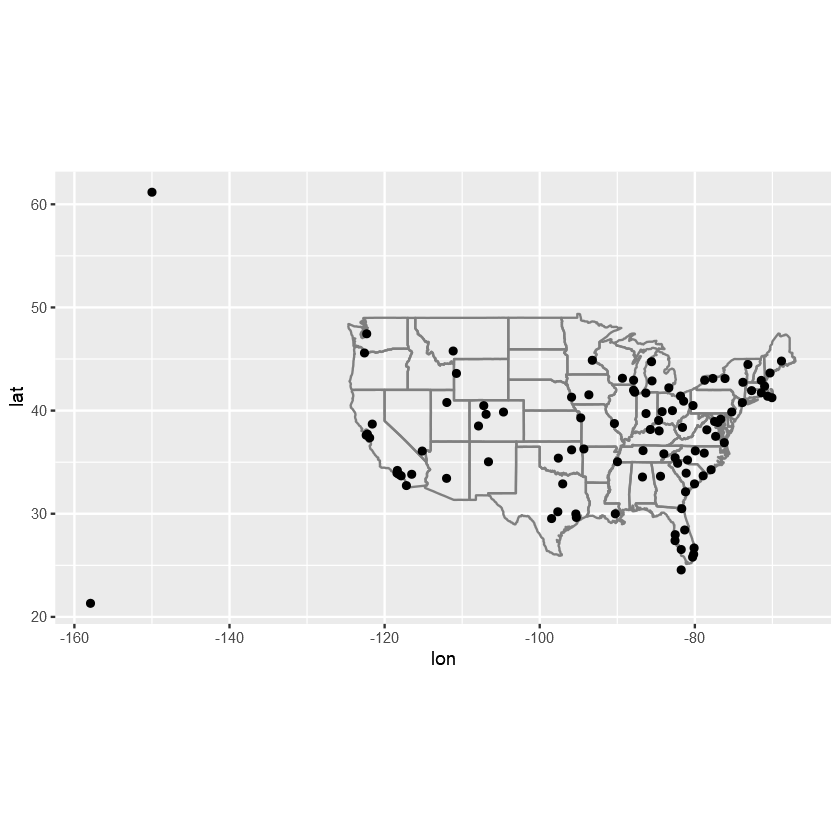

In [81]:
# 10.4.6
# 1
airports %>%
  semi_join(flights, c("faa" = "dest")) %>%
  ggplot(aes(lon, lat)) +
  borders("state") +
  geom_point() +
  coord_quickmap()

In [82]:
avg_dest_delays <- flights %>% group_by(dest) %>% 
    summarise(delay = mean(arr_delay, na.rm = T)) %>% 
    inner_join(airports, by = c("dest" = "faa"))

In [83]:
avg_dest_delays %>% head

dest delay     name                              lat      lon        alt  tz
1 ABQ   4.381890 Albuquerque International Sunport 35.04022 -106.60919 5355 -7
2 ACK   4.852273 Nantucket Mem                     41.25305  -70.06018   48 -5
3 ALB  14.397129 Albany Intl                       42.74827  -73.80169  285 -5
4 ANC  -2.500000 Ted Stevens Anchorage Intl        61.17436 -149.99636  152 -9
5 ATL  11.300113 Hartsfield Jackson Atlanta Intl   33.63672  -84.42807 1026 -5
6 AUS   6.019909 Austin Bergstrom Intl             30.19453  -97.66989  542 -6
  dst tzone            
1 A   America/Denver   
2 A   America/New_York 
3 A   America/New_York 
4 A   America/Anchorage
5 A   America/New_York 
6 A   America/Chicago

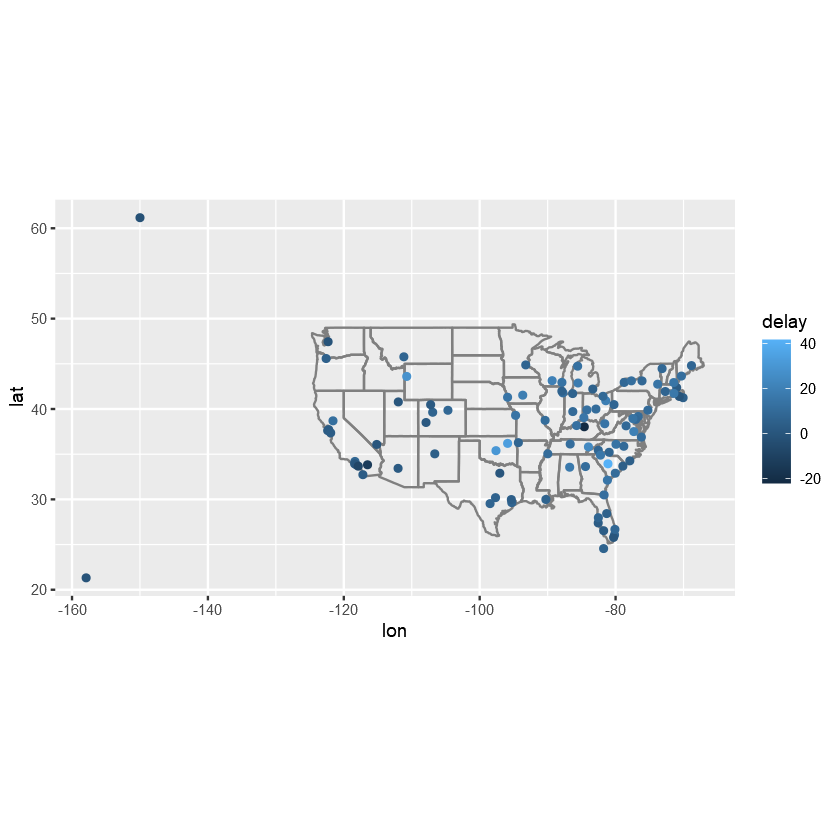

In [84]:
avg_dest_delays %>%
  ggplot(aes(lon, lat, colour = delay)) +
  borders("state") +
  geom_point() +
  coord_quickmap()

In [85]:
# 2 
airport_locations <- airports %>%
  select(faa, lat, lon)

flights %>%
  select(year:day, hour, origin, dest) %>%
  left_join(
    airport_locations,
    by = c("origin" = "faa")
  ) %>%
  left_join(
    airport_locations,
    by = c("dest" = "faa")
  ) %>% print

# A tibble: 336,776 x 10
    year month   day  hour origin dest  lat.x lon.x lat.y lon.y
   <int> <int> <int> <dbl> <chr>  <chr> <dbl> <dbl> <dbl> <dbl>
 1  2013     1     1     5 EWR    IAH    40.7 -74.2  30.0 -95.3
 2  2013     1     1     5 LGA    IAH    40.8 -73.9  30.0 -95.3
 3  2013     1     1     5 JFK    MIA    40.6 -73.8  25.8 -80.3
 4  2013     1     1     5 JFK    BQN    40.6 -73.8  NA    NA  
 5  2013     1     1     6 LGA    ATL    40.8 -73.9  33.6 -84.4
 6  2013     1     1     5 EWR    ORD    40.7 -74.2  42.0 -87.9
 7  2013     1     1     6 EWR    FLL    40.7 -74.2  26.1 -80.2
 8  2013     1     1     6 LGA    IAD    40.8 -73.9  38.9 -77.5
 9  2013     1     1     6 JFK    MCO    40.6 -73.8  28.4 -81.3
10  2013     1     1     6 LGA    ORD    40.8 -73.9  42.0 -87.9
# ... with 336,766 more rows


In [86]:
airport_locations <- airports %>%
  select(faa, lat, lon)

flights %>%
  select(year:day, hour, origin, dest) %>%
  left_join(
    airport_locations,
    by = c("origin" = "faa")
  ) %>%
  left_join(
    airport_locations,
    by = c("dest" = "faa"),
    suffix = c("_origin", "_dest")
  ) %>% print

# A tibble: 336,776 x 10
    year month   day  hour origin dest  lat_origin lon_origin lat_dest lon_dest
   <int> <int> <int> <dbl> <chr>  <chr>      <dbl>      <dbl>    <dbl>    <dbl>
 1  2013     1     1     5 EWR    IAH         40.7      -74.2     30.0    -95.3
 2  2013     1     1     5 LGA    IAH         40.8      -73.9     30.0    -95.3
 3  2013     1     1     5 JFK    MIA         40.6      -73.8     25.8    -80.3
 4  2013     1     1     5 JFK    BQN         40.6      -73.8     NA       NA  
 5  2013     1     1     6 LGA    ATL         40.8      -73.9     33.6    -84.4
 6  2013     1     1     5 EWR    ORD         40.7      -74.2     42.0    -87.9
 7  2013     1     1     6 EWR    FLL         40.7      -74.2     26.1    -80.2
 8  2013     1     1     6 LGA    IAD         40.8      -73.9     38.9    -77.5
 9  2013     1     1     6 JFK    MCO         40.6      -73.8     28.4    -81.3
10  2013     1     1     6 LGA    ORD         40.8      -73.9     42.0    -87.9
# ... with 336,

#### 여객기의 나이와 지연 시간 사이의 관계

In [87]:
# 3
plane_cohorts <- inner_join(flights,
  select(planes, tailnum, plane_year = year),
  by = "tailnum"
) %>%
  mutate(age = year - plane_year) %>%
  filter(!is.na(age)) %>%
  mutate(age = if_else(age > 25, 25L, age)) %>%
  group_by(age) %>%
  summarise(
    dep_delay_mean = mean(dep_delay, na.rm = TRUE),
    dep_delay_sd = sd(dep_delay, na.rm = TRUE),
    arr_delay_mean = mean(arr_delay, na.rm = TRUE),
    arr_delay_sd = sd(arr_delay, na.rm = TRUE),
    n_arr_delay = sum(!is.na(arr_delay)),
    n_dep_delay = sum(!is.na(dep_delay))
  )
plane_cohorts %>% print

# A tibble: 26 x 7
     age dep_delay_mean dep_delay_sd arr_delay_mean arr_delay_sd n_arr_delay
   <int>          <dbl>        <dbl>          <dbl>        <dbl>       <int>
 1     0          10.6          34.4           4.01         38.5        4611
 2     1           9.64         31.9           2.85         37.4        7196
 3     2          11.8          41.8           5.70         46.8        6008
 4     3          12.5          37.5           5.18         41.9        3771
 5     4          11.0          35.5           4.92         39.7        6572
 6     5          13.2          39.6           5.57         43.9       17731
 7     6          13.7          41.4           7.54         45.2       15142
 8     7          14.6          41.3           9.90         45.1       12998
 9     8          14.7          41.5           9.80         45.4       14064
10     9          16.4          44.2          10.2          48.0       15273
# ... with 16 more rows, and 1 more variable: n_dep_delay

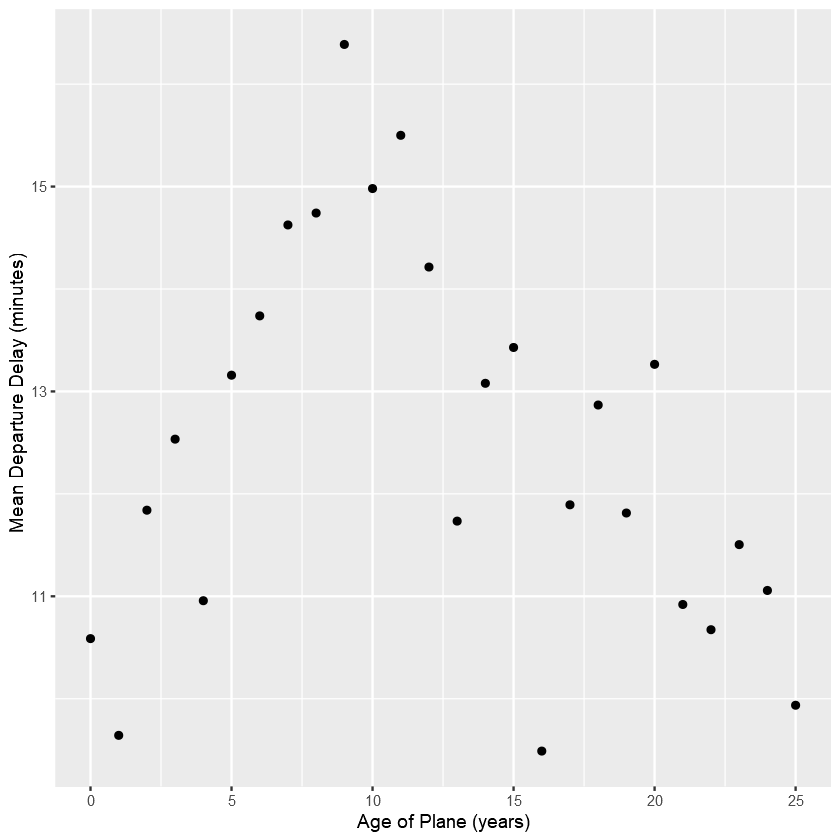

In [88]:
ggplot(plane_cohorts, aes(x = age, y = dep_delay_mean)) +
  geom_point() + 
    xlab("Age of Plane (years)") + ylab("Mean Departure Delay (minutes)")

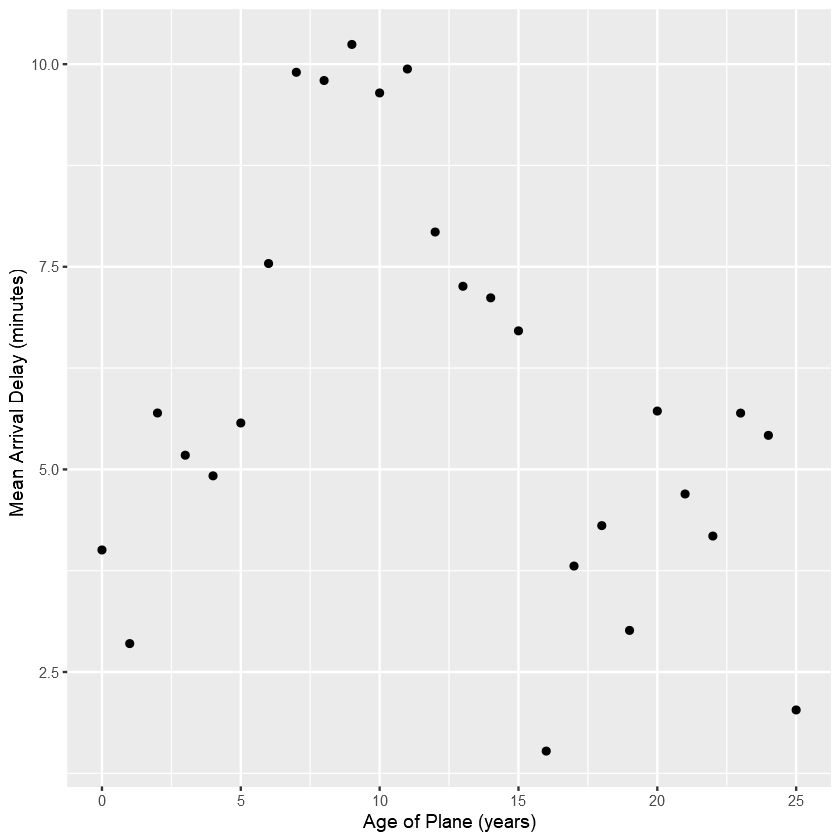

In [89]:
ggplot(plane_cohorts, aes(x = age, y = arr_delay_mean)) +
  geom_point() + 
    xlab("Age of Plane (years)") + ylab("Mean Arrival Delay (minutes)")

In [90]:
# 4
flight_weather <- flights %>% 
    inner_join(weather, by = c("origin" = "origin",
                              "year" = "year",
                              "month" = "month",
                              "day" = "day",
                              "hour" = "hour"))
head(flight_weather)

year month day dep_time sched_dep_time dep_delay arr_time sched_arr_time
1 2013 1     1   517      515             2         830      819          
2 2013 1     1   533      529             4         850      830          
3 2013 1     1   542      540             2         923      850          
4 2013 1     1   544      545            -1        1004     1022          
5 2013 1     1   554      600            -6         812      837          
6 2013 1     1   554      558            -4         740      728          
  arr_delay carrier ... temp  dewp  humid wind_dir wind_speed wind_gust precip
1  11       UA      ... 39.02 28.04 64.43 260      12.65858         NA  0     
2  20       UA      ... 39.92 24.98 54.81 250      14.96014   21.86482  0     
3  33       AA      ... 39.02 26.96 61.63 260      14.96014         NA  0     
4 -18       B6      ... 39.02 26.96 61.63 260      14.96014         NA  0     
5 -25       DL      ... 39.92 24.98 54.81 260      16.11092   23.01560  0     
6  12       UA      ... 39.02 28.04 64.43 260      12.65858         NA  0     
  pressure visib time_hour.y        
1 1011.9   10    2013-01-01 05:00:00
2 1011.4   10    2013-01-01 05:00:00
3 1012.1   10    2013-01-01 05:00:00
4 1012.1   10    2013-01-01 05:00:00
5 1011.7   10    2013-01-01 06:00:00
6 1011.9   10    2013-01-01 05:00:00

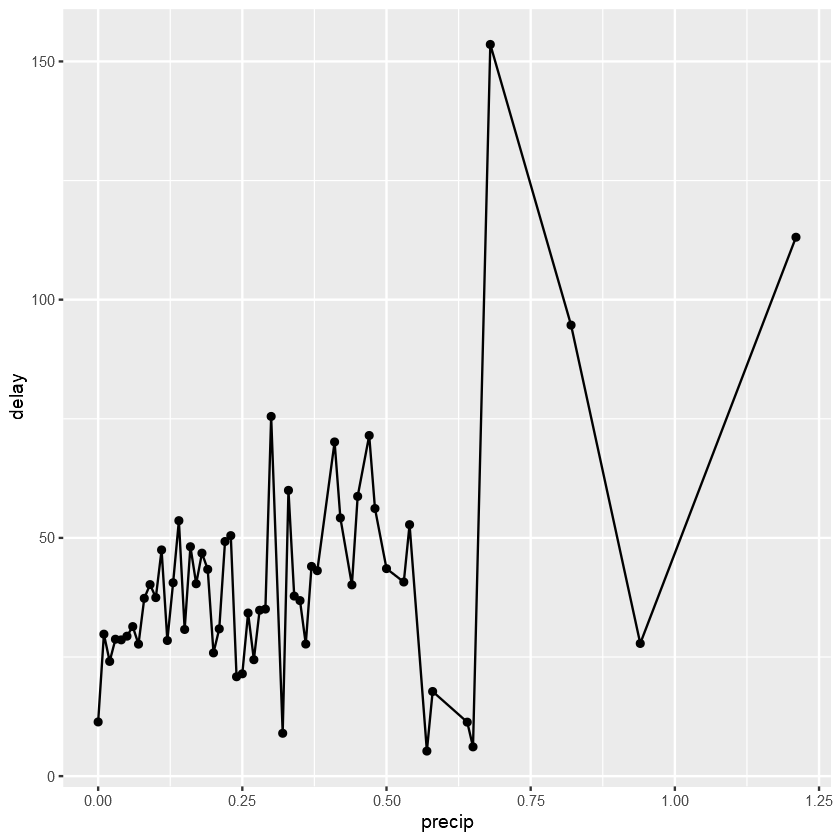

In [91]:
flight_weather %>%
    group_by(precip) %>% 
    summarise(delay = mean(dep_delay, na.rm = T)) %>%
    ggplot(aes(precip, delay)) + geom_line() + geom_point()

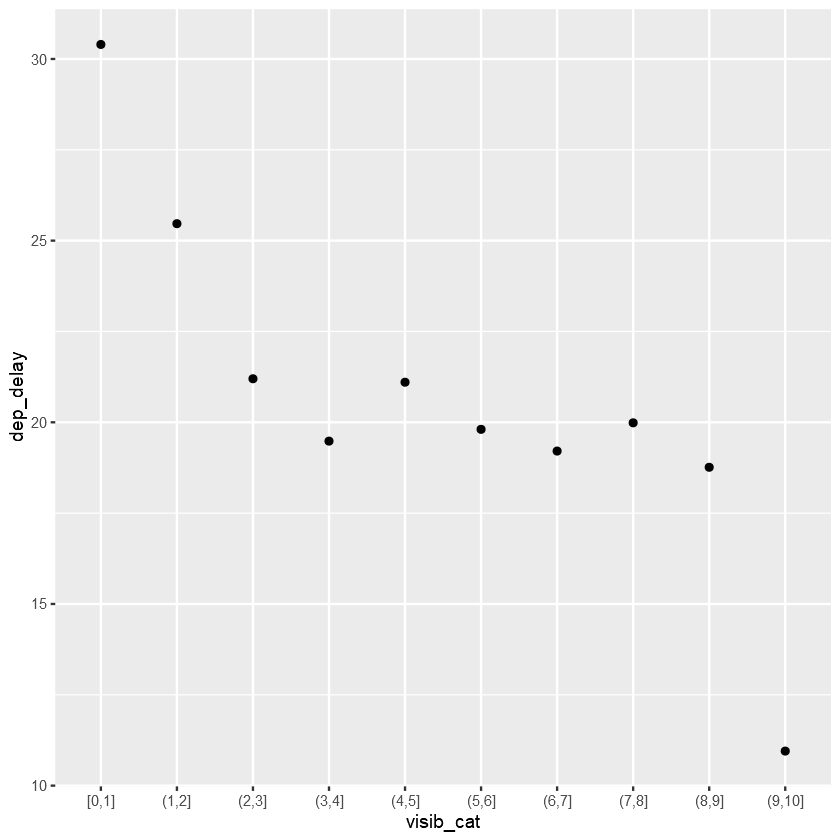

In [92]:
flight_weather %>%
    ungroup() %>%
    mutate(visib_cat = cut_interval(visib, n = 10)) %>%
    group_by(visib_cat) %>%
    summarise(dep_delay = mean(dep_delay, na.rm = T)) %>%
    ggplot(aes(visib_cat, dep_delay)) + geom_point()

Warning message:
"Removed 3 rows containing missing values (geom_point)."


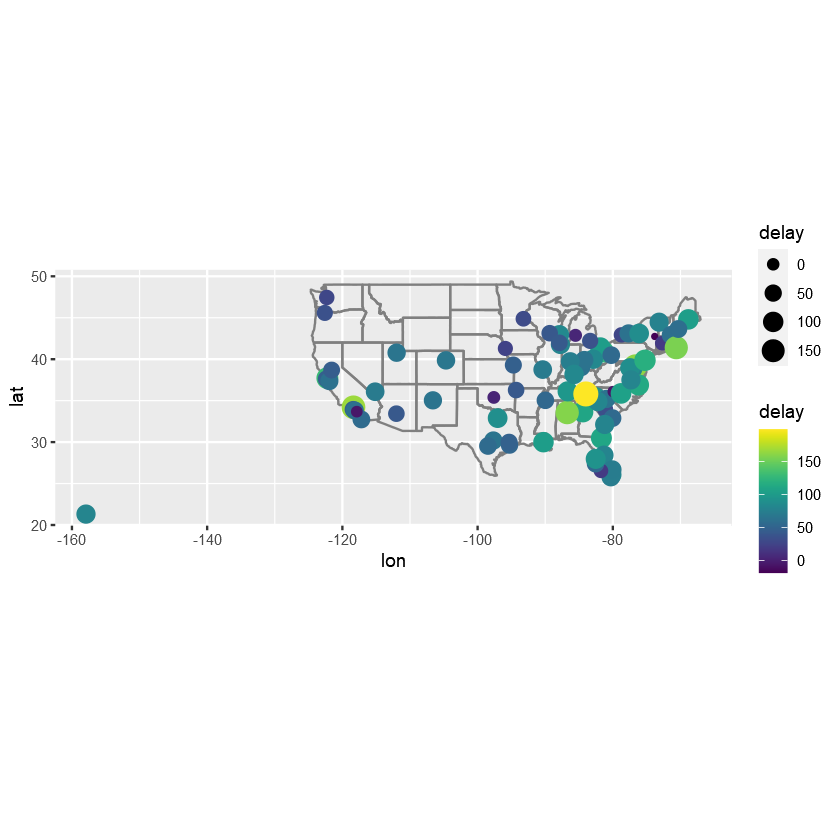

In [93]:
# 5
library(viridis)
flights %>%
  filter(year == 2013, month == 6, day == 13) %>%
  group_by(dest) %>%
  summarise(delay = mean(arr_delay, na.rm = TRUE)) %>%
  inner_join(airports, by = c("dest" = "faa")) %>%
  ggplot(aes(y = lat, x = lon, size = delay, colour = delay)) +
  borders("state") +
  geom_point() +
  coord_quickmap() + scale_colour_viridis()

### merge()  & SQL
```
inner_join(x, y) : merge(x, y)
left_join(x, y) : merge(x, y, all.x = T)
right_join(x, y) : merge(x, y, all.y = T)
full_join(x, y) : merge(x, y, all.x = T, all.y = T)
```

```
inner_join(x, y, by = "z") : SELECT * FROM x INNER JOIN y USING (z)
left_join(x, y, by = "z") : SELECT * FROM x LEFT OUTER JOIN y USING (z)
right_join(x, y, by = "z") : SELECT * FROM x RIGHT OUTER JOIN y USING (z)
full_join(x, y, by = "z") : SELECT * FROM x FULL OUTER JOIN JOIN y USING (z)
```

### 필터링 조인
- semi_join(x, y) : y와 매치되는 x의 모든 관측값을 보존 (X값만 출력)
- anti_join(x, y) : y와 매치되는 x의 모든 관측값을 삭제 (X값만 출력)

In [94]:
top_dest <- flights %>%
    count(dest, sort = T) %>% head(10)

In [95]:
flights %>% semi_join(top_dest) %>% print

Joining, by = "dest"


# A tibble: 141,145 x 19
    year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
   <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
 1  2013     1     1      542            540         2      923            850
 2  2013     1     1      554            600        -6      812            837
 3  2013     1     1      554            558        -4      740            728
 4  2013     1     1      555            600        -5      913            854
 5  2013     1     1      557            600        -3      838            846
 6  2013     1     1      558            600        -2      753            745
 7  2013     1     1      558            600        -2      924            917
 8  2013     1     1      558            600        -2      923            937
 9  2013     1     1      559            559         0      702            706
10  2013     1     1      600            600         0      851            858
# ... with 141,135 more row

In [96]:
flights %>% anti_join(planes, by = "tailnum") %>% count(tailnum, sort = T) %>% head

tailnum n   
1 NA      2512
2 N725MQ   575
3 N722MQ   513
4 N723MQ   507
5 N713MQ   483
6 N735MQ   396

In [99]:
# 10.5.1
# 2
planes_gte100 <- flights %>%
  filter(!is.na(tailnum)) %>%
  group_by(tailnum) %>%
  count() %>%
  filter(n >= 100) %>% print()

# A tibble: 1,217 x 2
# Groups:   tailnum [1,217]
   tailnum     n
   <chr>   <int>
 1 N0EGMQ    371
 2 N10156    153
 3 N10575    289
 4 N11106    129
 5 N11107    148
 6 N11109    148
 7 N11113    138
 8 N11119    148
 9 N11121    154
10 N11127    124
# ... with 1,207 more rows


In [109]:
#3
fueleconomy::vehicles %>% print
fueleconomy::common %>% print

# A tibble: 33,442 x 12
      id make  model        year class trans drive   cyl displ fuel    hwy   cty
   <dbl> <chr> <chr>       <dbl> <chr> <chr> <chr> <dbl> <dbl> <chr> <dbl> <dbl>
 1 13309 Acura 2.2CL/3.0CL  1997 Subc~ Auto~ Fron~     4   2.2 Regu~    26    20
 2 13310 Acura 2.2CL/3.0CL  1997 Subc~ Manu~ Fron~     4   2.2 Regu~    28    22
 3 13311 Acura 2.2CL/3.0CL  1997 Subc~ Auto~ Fron~     6   3   Regu~    26    18
 4 14038 Acura 2.3CL/3.0CL  1998 Subc~ Auto~ Fron~     4   2.3 Regu~    27    19
 5 14039 Acura 2.3CL/3.0CL  1998 Subc~ Manu~ Fron~     4   2.3 Regu~    29    21
 6 14040 Acura 2.3CL/3.0CL  1998 Subc~ Auto~ Fron~     6   3   Regu~    26    17
 7 14834 Acura 2.3CL/3.0CL  1999 Subc~ Auto~ Fron~     4   2.3 Regu~    27    20
 8 14835 Acura 2.3CL/3.0CL  1999 Subc~ Manu~ Fron~     4   2.3 Regu~    29    21
 9 14836 Acura 2.3CL/3.0CL  1999 Subc~ Auto~ Fron~     6   3   Regu~    26    17
10 11789 Acura 2.5TL        1995 Comp~ Auto~ Fron~     5   2.5 Prem~    23    18
# ..

In [111]:
fueleconomy::vehicles %>% 
semi_join(fueleconomy::common, c("make", "model")) %>% 
print

# A tibble: 14,531 x 12
      id make  model    year class     trans drive   cyl displ fuel    hwy   cty
   <dbl> <chr> <chr>   <dbl> <chr>     <chr> <chr> <dbl> <dbl> <chr> <dbl> <dbl>
 1  1833 Acura Integra  1986 Subcompa~ Auto~ Fron~     4   1.6 Regu~    28    22
 2  1834 Acura Integra  1986 Subcompa~ Manu~ Fron~     4   1.6 Regu~    28    23
 3  3037 Acura Integra  1987 Subcompa~ Auto~ Fron~     4   1.6 Regu~    28    22
 4  3038 Acura Integra  1987 Subcompa~ Manu~ Fron~     4   1.6 Regu~    28    23
 5  4183 Acura Integra  1988 Subcompa~ Auto~ Fron~     4   1.6 Regu~    27    22
 6  4184 Acura Integra  1988 Subcompa~ Manu~ Fron~     4   1.6 Regu~    28    23
 7  5303 Acura Integra  1989 Subcompa~ Auto~ Fron~     4   1.6 Regu~    27    22
 8  5304 Acura Integra  1989 Subcompa~ Manu~ Fron~     4   1.6 Regu~    28    23
 9  6442 Acura Integra  1990 Subcompa~ Auto~ Fron~     4   1.8 Regu~    24    20
10  6443 Acura Integra  1990 Subcompa~ Manu~ Fron~     4   1.8 Regu~    26    21
# ..

In [123]:
# 4
worst_hours <- flights %>%
  mutate(hour = sched_dep_time %/% 100) %>%
  group_by(origin, year, month, day, hour) %>%
  summarise(dep_delay = mean(dep_delay, na.rm = TRUE)) %>%
  ungroup() %>%
  arrange(desc(dep_delay)) %>%
  slice(1:48)
worst_hours %>% print

`summarise()` has grouped output by 'origin', 'year', 'month', 'day'. You can override using the `.groups` argument.


# A tibble: 48 x 6
   origin  year month   day  hour dep_delay
   <chr>  <int> <int> <int> <dbl>     <dbl>
 1 LGA     2013     7    28    21      280.
 2 EWR     2013     2     9    10      269 
 3 EWR     2013     2     9     9      266 
 4 LGA     2013     9     2    16      250.
 5 LGA     2013     7    22    18      246.
 6 LGA     2013     7    28    19      240.
 7 JFK     2013     4    10    21      237 
 8 LGA     2013     9    12    20      226.
 9 EWR     2013     3     8    12      225.
10 LGA     2013    12     5    11      221.
# ... with 38 more rows


In [126]:
weather_most_delayed <- semi_join(weather, worst_hours, 
                                  by = c("origin", "year",
                                         "month", "day", "hour")) %>% print

# A tibble: 48 x 15
   origin  year month   day  hour  temp  dewp humid wind_dir wind_speed
   <chr>  <int> <int> <int> <int> <dbl> <dbl> <dbl>    <dbl>      <dbl>
 1 EWR     2013     2     9     9  27.0  17.1  65.8      310      13.8 
 2 EWR     2013     2     9    10  28.0  16.0  60.1      310      19.6 
 3 EWR     2013     2     9    11  28.9  16.0  57.9      320      28.8 
 4 EWR     2013     3     8    12  33.8  32    95.8      320       9.21
 5 EWR     2013     3     8    14  34.0  33.1  96.5      320       8.06
 6 EWR     2013     6    30    16  80.1  73.0  79.2      160       8.06
 7 EWR     2013     7    10    19  86    69.1  57.1      250      13.8 
 8 EWR     2013     7    28    19  73.4  71.6  94.1       NA       6.90
 9 EWR     2013     9    12    17  84.0  73.0  69.6      180       5.75
10 EWR     2013     9    12    19  78.8  71.6  93.5      260      18.4 
# ... with 38 more rows, and 5 more variables: wind_gust <dbl>, precip <dbl>,
#   pressure <dbl>, visib <dbl>, time_

In [128]:
select(weather_most_delayed, temp, wind_speed, precip) %>%
  print

# A tibble: 48 x 3
    temp wind_speed precip
   <dbl>      <dbl>  <dbl>
 1  27.0      13.8    0   
 2  28.0      19.6    0   
 3  28.9      28.8    0   
 4  33.8       9.21   0.06
 5  34.0       8.06   0.05
 6  80.1       8.06   0   
 7  86        13.8    0   
 8  73.4       6.90   0.08
 9  84.0       5.75   0   
10  78.8      18.4    0.23
# ... with 38 more rows


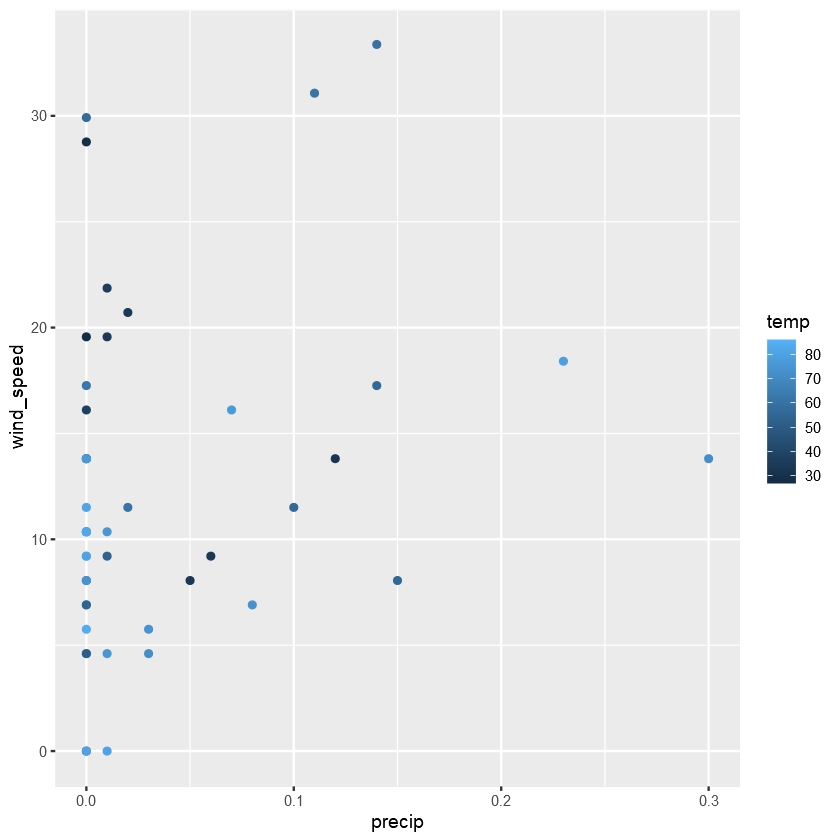

In [129]:
ggplot(weather_most_delayed, aes(x = precip, y = wind_speed, color = temp)) +
  geom_point()

In [135]:
# 5
anti_join(flights, airports, by = c("dest" = "faa")) %>% distinct(dest)

dest
1 BQN 
2 SJU 
3 STT 
4 PSE

In [139]:
anti_join(airports, flights, by = c("faa" = "dest")) %>% print

# A tibble: 1,357 x 8
   faa   name                             lat    lon   alt    tz dst   tzone    
   <chr> <chr>                          <dbl>  <dbl> <dbl> <dbl> <chr> <chr>    
 1 04G   Lansdowne Airport               41.1  -80.6  1044    -5 A     America/~
 2 06A   Moton Field Municipal Airport   32.5  -85.7   264    -6 A     America/~
 3 06C   Schaumburg Regional             42.0  -88.1   801    -6 A     America/~
 4 06N   Randall Airport                 41.4  -74.4   523    -5 A     America/~
 5 09J   Jekyll Island Airport           31.1  -81.4    11    -5 A     America/~
 6 0A9   Elizabethton Municipal Airport  36.4  -82.2  1593    -5 A     America/~
 7 0G6   Williams County Airport         41.5  -84.5   730    -5 A     America/~
 8 0G7   Finger Lakes Regional Airport   42.9  -76.8   492    -5 A     America/~
 9 0P2   Shoestring Aviation Airfield    39.8  -76.6  1000    -5 U     America/~
10 0S9   Jefferson County Intl           48.1 -123.    108    -8 A     America/~
# ... 

In [145]:
# 6
planes_carriers <-
  flights %>%
  filter(!is.na(tailnum)) %>%
  distinct(tailnum, carrier) %>% print

# A tibble: 4,060 x 2
   carrier tailnum
   <chr>   <chr>  
 1 UA      N14228 
 2 UA      N24211 
 3 AA      N619AA 
 4 B6      N804JB 
 5 DL      N668DN 
 6 UA      N39463 
 7 B6      N516JB 
 8 EV      N829AS 
 9 B6      N593JB 
10 AA      N3ALAA 
# ... with 4,050 more rows


In [144]:
planes_carriers %>%
  count(tailnum) %>%
  filter(n > 1) %>% print

# A tibble: 17 x 2
   tailnum     n
   <chr>   <int>
 1 N146PQ      2
 2 N153PQ      2
 3 N176PQ      2
 4 N181PQ      2
 5 N197PQ      2
 6 N200PQ      2
 7 N228PQ      2
 8 N232PQ      2
 9 N933AT      2
10 N935AT      2
11 N977AT      2
12 N978AT      2
13 N979AT      2
14 N981AT      2
15 N989AT      2
16 N990AT      2
17 N994AT      2


In [142]:
carrier_transfer_tbl <- planes_carriers %>%
  group_by(tailnum) %>%
  filter(n() > 1) %>%
  left_join(airlines, by = "carrier") %>%
  arrange(tailnum, carrier)

In [143]:
carrier_transfer_tbl %>% print

# A tibble: 34 x 3
# Groups:   tailnum [17]
   carrier tailnum name                    
   <chr>   <chr>   <chr>                   
 1 9E      N146PQ  Endeavor Air Inc.       
 2 EV      N146PQ  ExpressJet Airlines Inc.
 3 9E      N153PQ  Endeavor Air Inc.       
 4 EV      N153PQ  ExpressJet Airlines Inc.
 5 9E      N176PQ  Endeavor Air Inc.       
 6 EV      N176PQ  ExpressJet Airlines Inc.
 7 9E      N181PQ  Endeavor Air Inc.       
 8 EV      N181PQ  ExpressJet Airlines Inc.
 9 9E      N197PQ  Endeavor Air Inc.       
10 EV      N197PQ  ExpressJet Airlines Inc.
# ... with 24 more rows


### 조인 문제
* 조인을 원활하게 하기 위해서 주어진 데이터에 수행해야 하는 몇가지 작업

1. 각 테이블에서 기본키를 구성하는 벼수 식별
2. 기본키의 변수들에 결측값 확인
3. 외래키가 다른 테이블의 기본키와 매칭되는 지 확인 (anti_join)

### 집합 연산

```
intersect(x, y) : 교집합
union(x, y) : 합집합
setdiff(x, y) : 차집합
```

In [146]:
df1 <- tribble(
    ~x, ~y,
    1, 1,
    2, 1
)
df2 <- tribble(
    ~x, ~y,
    1, 1,
    1, 2
)

In [147]:
intersect(df1, df2)

x y
1 1 1

In [148]:
union(df1, df2)

x y
1 1 1
2 2 1
3 1 2

In [151]:
setdiff(df1, df2) ; setdiff(df2, df1)

x y
1 2 1

x y
1 1 2